In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


In [123]:
df = pd.read_csv('C:\\Users\\lesedi msiya\\Desktop\\Level 3\\L3T12\\UsArrests.csv')
df

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.20,236,58,21.20
1,Alaska,10.00,263,48,44.50
2,Arizona,8.10,294,80,31.00
3,Arkansas,8.80,190,50,19.50
4,California,9.00,276,91,40.60
5,Colorado,7.90,204,78,38.70
6,Connecticut,3.30,110,77,11.10
7,Delaware,5.90,238,72,15.80
8,Florida,15.40,335,80,31.90
9,Georgia,17.40,211,60,25.80


In [124]:
#finding missing values
df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

There are no missing values in the data, no imputations will be done

In [125]:
# veiwing statistical properties of the data
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
statistic = df.describe()
stats = statistic.loc[["mean","std","min","max"]].transpose() 
stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


The most common crime is assualt followed by rape, murder is the least common crime commited. 

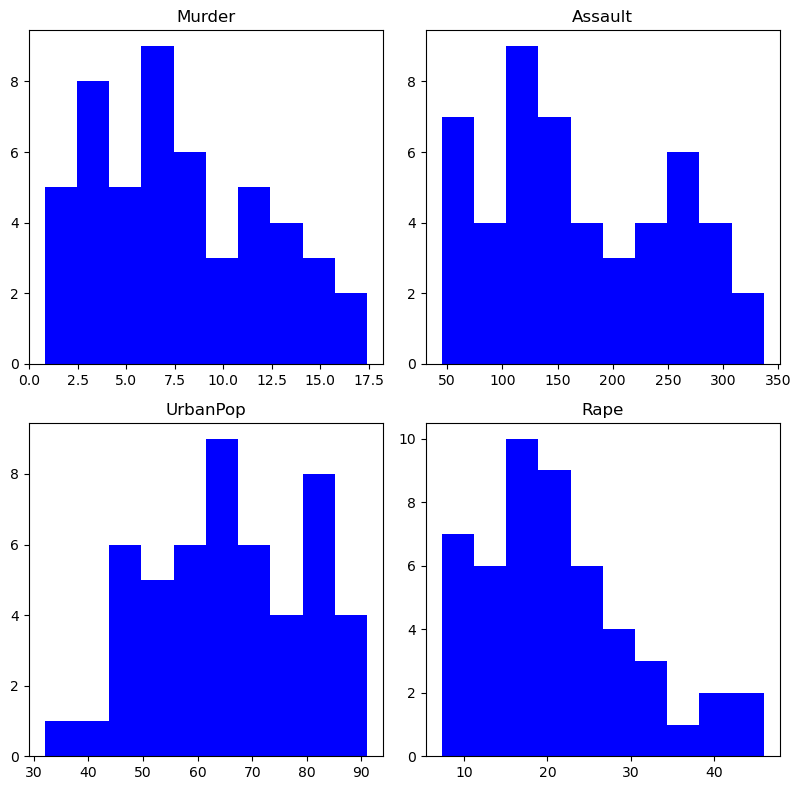

In [126]:
# ploting histograms to see the spread of each variable
histogram = df.hist(color='blue', grid=False, figsize=(8, 8))
plt.tight_layout()
plt.show()

The histograms above show the frequesncies of each crime as well as the urban population, the assult histogram clearly shows that assult has higher frequencies and a larger scale than the other variables.

C:\Users\lesedi msiya\AppData\Local\Temp\ipykernel_7832\1636218126.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


<AxesSubplot:>

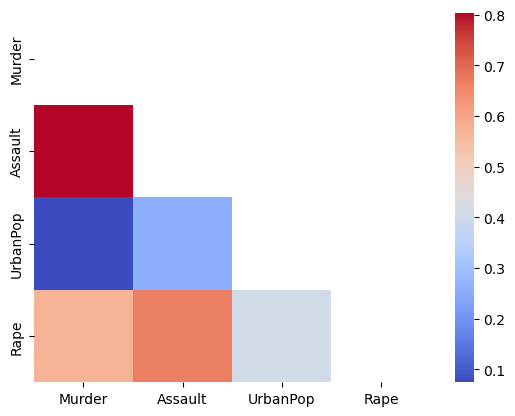

In [101]:
#correlation analysis
cities = df.index
corr_df = df.drop(["City"],axis=1).corr()
labels =corr_df.columns
correlations = corr_df.corr()
#plotting a heatmap
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

From the correlation we observe that the variables are positively correlated, none of the variables are negatively correlated but the levels of correlation differ. From the heatmap we observe that assult has a high correlation with murder which means that for most crimes where the victim was murdered the victims were most likely assulted as well. Murder and rape have a correltion of 0.5 which is not a very high correlation but it indicates that some victims that were raped were also murdered. The correlation between assult and rape is 0.6 which indicated that most victims that were raped were also assulted. furthermore, urban population and murder have a very low correlation of 0.1 , this means that most murders do not happen in urban areas. Assult and rape have correlations with urban population which is around 0.3 and 0.4 respectively, this indicates that most assults and rapes occur in urban areas. 

In [102]:
#PCA before scalling
np.set_printoptions(precision=2)
X = df.drop(["City"],axis=1).values.squeeze()
pca = PCA()
X_trans = pca.fit_transform(X)
df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.83,11.41,-2.30,2.54
1,92.84,18.04,20.00,-3.87
2,124.11,-8.89,-1.34,-4.20
3,18.31,16.70,0.07,-0.94
4,107.43,-22.45,6.54,-2.56


In [121]:
#fining standard deviation, proportion of variance and cumulative proportion
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Standard deviation: [83.74 14.21  6.5   2.5 ]
Proportion of Variance Explained: [9.66e-01 2.78e-02 5.82e-03 8.62e-04]
Cumulative Proportion: [7011.93 7213.86 7256.13 7262.39]


The first principal component has the highest standard deviation and proportion of variance followed by the second principal component

In [106]:
# plotting a biplot of the data before scalling
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots()    
    ax.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

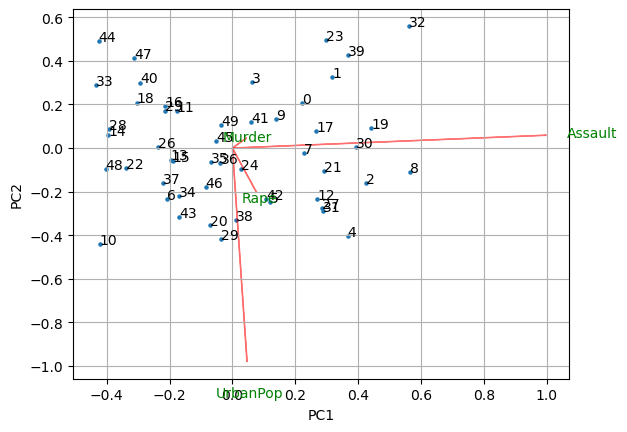

In [107]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

In [108]:
# determining features of importance before scalling
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
pc1 = abs( pca.components_[0] ) 
pc2 = abs( pca.components_[1] )
feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.044
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.076,0.200


For the first principal component assult has the highest importance, this may also be caused by the fact that assult has the highest mean in the data as seen eariler, in the second principal component urban popualtion has the highest importance this may also be caused by that urban population has the second highest mean in the data, the biplot above also shows assult anf urban population with the longest arrows comapred to the other variables because they are the dominant variables in the principal components.

In [109]:
# scaling the data using standard scaler()
X_std = StandardScaler().fit_transform(X)
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)
df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,-1.011,1.135,-0.440,0.179
1,-1.983,1.123,1.988,-0.407
2,-1.816,-0.725,0.066,-0.798
3,0.201,1.081,0.132,-0.247
4,-2.552,-1.501,0.557,-0.307


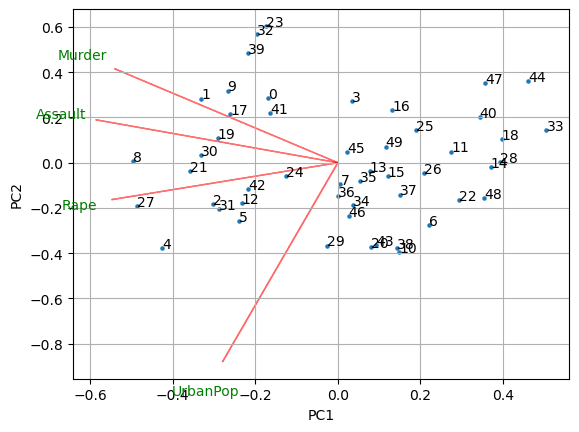

In [110]:
# plotting a biplot of the scaled data
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

From the biplot we observe that the first principal component separates the cities into two parts the cities on the left are highly correlated with murder, rape and assult where as the cities on the right have low correlations with these crimes. The cities that have these high rapes, murders and assult are Alabama, Alaska, Louisiana, Georgia, South Carolina, Tennesse, North Carolina, Missisipi, etc. the cities with the least crimes are cities such as Kentucky, Wyoming, South Dakota, Nebraska, West Virgina,Indiana, Pennsylviana, etc. There are more cities without low correlations with crimes than there are cities with high correlations with crimes, this indicates that crimes are concentrated in certain parts of the US this may be due to , lack of proper law inforcements, high levels of corruption within the governemnt, etc. The second principal componet is positively correlated with murder and assult and negatively correlated with rape and urban population with urban population having the highest negative correlation to the second principal component.

In [111]:
# feature importance after scalling
pc1 = abs( std_pca.components_[0] ) 
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.537,0.413
1,Assault,0.582,0.189
2,UrbanPop,0.278,0.876
3,Rape,0.544,0.162


After the data has been scaled, we observe that in the first principal component murder, assult and rape have a similar importance with assult being the highest however, murder and rape are of similar importance, urban population is the least important. In the second principal component urban population has the highest importance followed by murder.

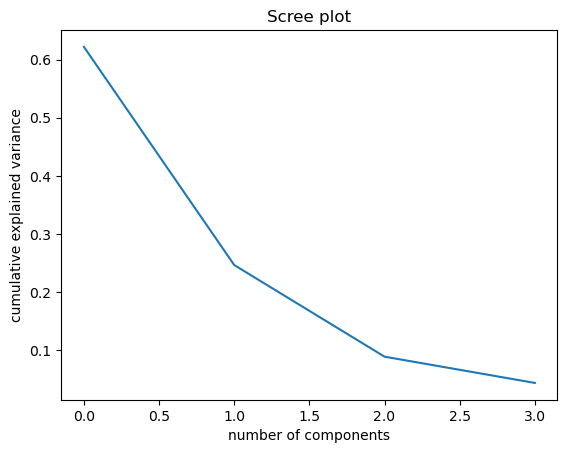

In [112]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

Text(0.5, 1.0, 'Cumulative Explained Variance')

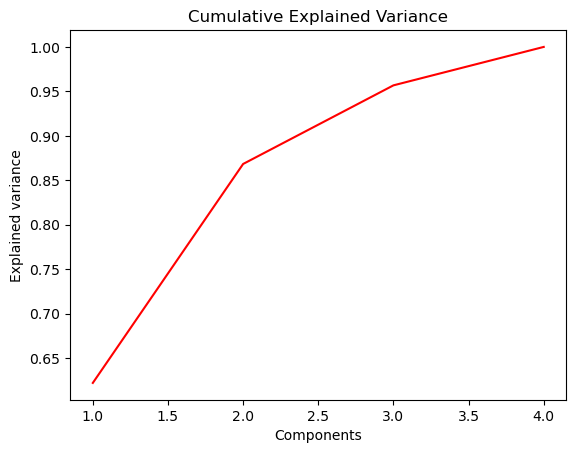

In [113]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

The scree plot has a bend at number 2, hence the first two principal components will be used, the first two principal components explain 88% of the variance in the data. 

In [114]:
#creating a dataframe of the first two principal components
pca_df = pd.DataFrame(X_std_trans[:,0:2], index = df.index)
pca_df.head()

,0,1
0,-1.011,1.135
1,-1.983,1.123
2,-1.816,-0.725
3,0.201,1.081
4,-2.552,-1.501


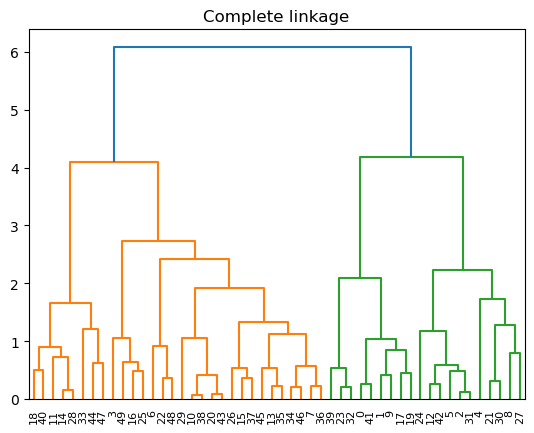

In [115]:
# creating a dendrogram
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)
# plotting a dendrogram using complete linkage as the method
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

The dendrogram above indicates two clusters, the dendrogram has clustered the cities based on those with crimes(murder, rape, assult) and those with less or no crimes, the cluster represented by green lines is the one with cities that have the most murders, rapes and assults, the cities represented by the orange cluster are the ones with less or no crimes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


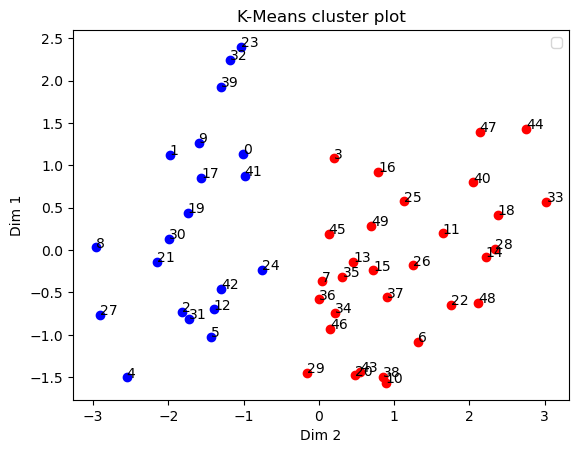

In [117]:
# creating a k means cluster, where K = 2 as determined above by the dendrogram and scree plot
x = X_std_trans[:,0]
y = X_std_trans[:,1]
k=2 
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 
for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

The K-means cluster plot above shows two clusters these are the cities with crimes of assult, rape and murder,these cities are on the left plotted in blue, the cities with the least crimes are on the right, this cluster plot differentiats and plots the cities the same way the biplot represented the cities